In [30]:
from typing import TypedDict
from langgraph.graph import StateGraph,START,END

In [31]:
class schema(TypedDict):
    num1:int
    num2:int
    operation:str
    result:int

In [32]:
def adder(state:schema)->schema:
    state['result']=state['num1']+state['num2']
    return state

def subtractor(state:schema)->schema:
    state['result']=state['num1']-state['num2']
    return state

In [ ]:
def decision_node(state:schema)->str:
    if(state['operation']=='+'):
        return "add_op"
    if(state['operation']=='-'):
        return "sub_op"

In [34]:
graph=StateGraph(schema)
graph.add_node("adder",adder)
graph.add_node("subtractor",subtractor)
graph.add_node("decision",lambda x: x)
graph.add_edge(START,"decision")
graph.add_conditional_edges(
    "decision",
    decision_node,
    {
        "add_op":"adder",
        "sub_op":"subtractor"
    })
graph.add_edge("adder",END)
graph.add_edge("subtractor",END)

app=graph.compile()
result=app.invoke({"num1":10,"num2":5,"operation":'+'})
print(result)

{'num1': 10, 'num2': 5, 'operation': '+', 'result': 15}


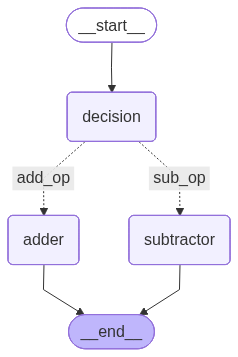

In [35]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))